In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

In [3]:
df_as = pd.read_csv('/Users/jtpdowns/Documents/fall 2016/w207/AllstateChallenge/data_in/train.csv')

In [4]:
n_as = len(df_as)
indices = np.arange(n_as)
np.random.shuffle(indices)
train_ix = indices[:(0.8*n_as)]
devel_ix = indices[(0.8*n_as):]
train_df = df_as.ix[train_ix]
devel_df = df_as.ix[devel_ix]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


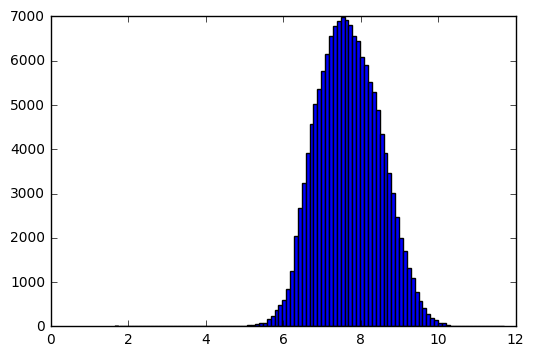

In [5]:
plt.hist(np.log(train_df['loss']), bins=100)
plt.show()

In [6]:
binary = list()
for col in df_as.columns:
    if len(np.unique(df_as[col])) == 2:
        train_df[col] = np.where(train_df[col]=='A', 0, 1)
        devel_df[col] = np.where(devel_df[col]=='A', 0, 1)
        binary.append(col)

cont1
mean: 0.493861364564
standard deviation: 0.187639678213


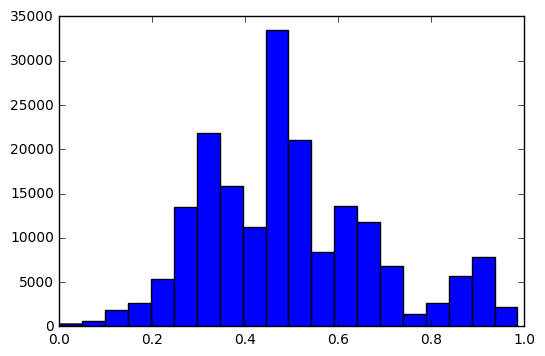


cont2
mean: 0.507188356179
standard deviation: 0.207201188471


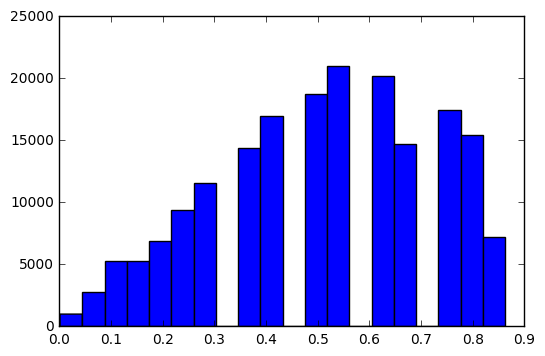


cont3
mean: 0.498918450722
standard deviation: 0.202104071588


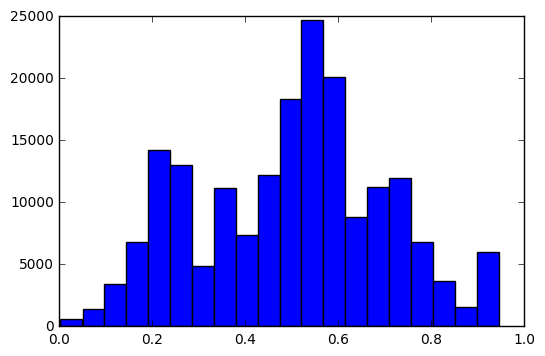


cont4
mean: 0.491812302589
standard deviation: 0.211291651694


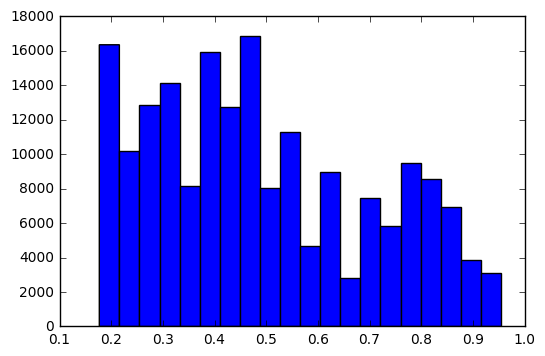


cont5
mean: 0.487427728783
standard deviation: 0.20902627356


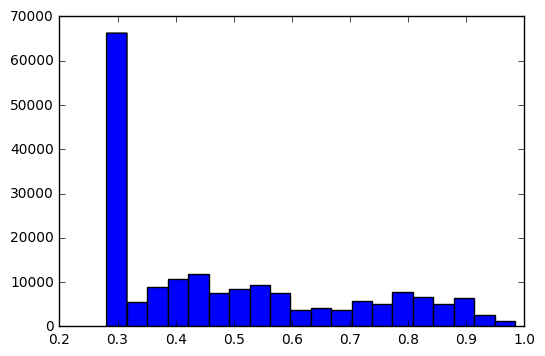


cont6
mean: 0.490944533735
standard deviation: 0.205272024819


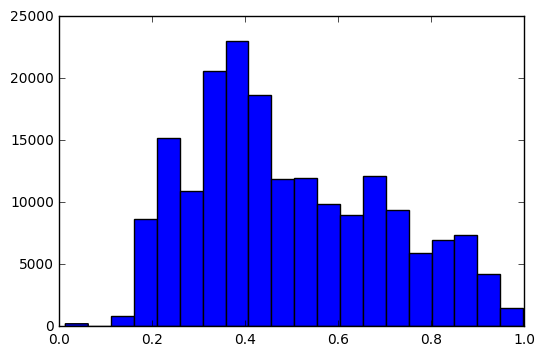


cont7
mean: 0.484970205068
standard deviation: 0.17844969016


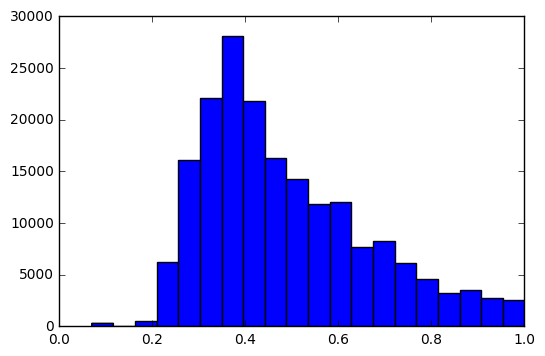


cont8
mean: 0.48643731587
standard deviation: 0.199369925215


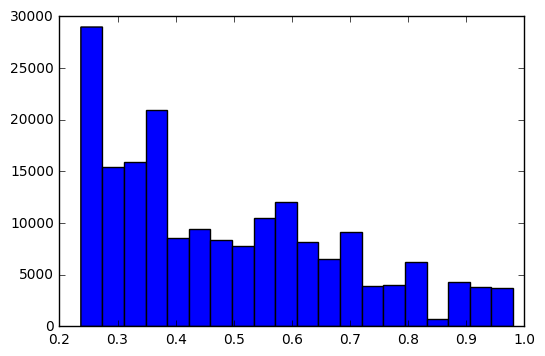


cont9
mean: 0.485506319895
standard deviation: 0.181659689027


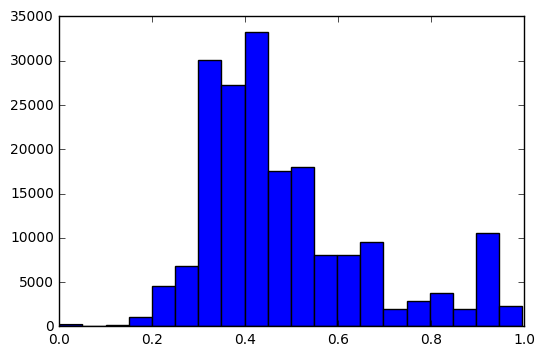


cont10
mean: 0.498065850423
standard deviation: 0.185876232413


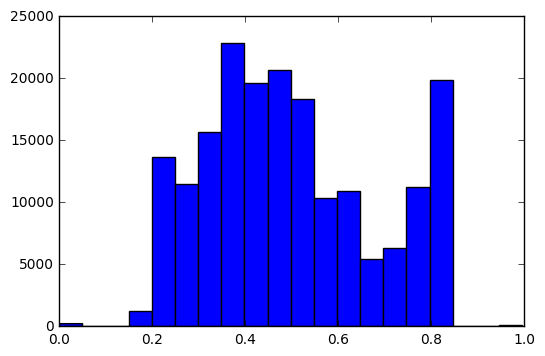


cont11
mean: 0.493511008555
standard deviation: 0.209735954579


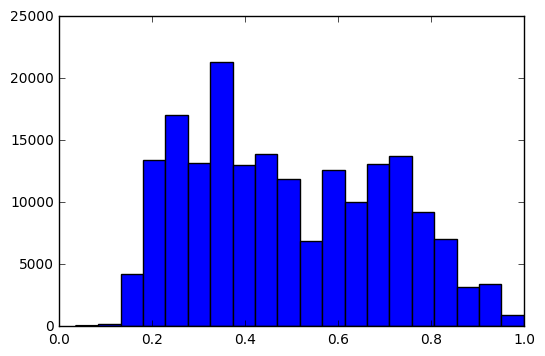


cont12
mean: 0.493150425626
standard deviation: 0.20942606503


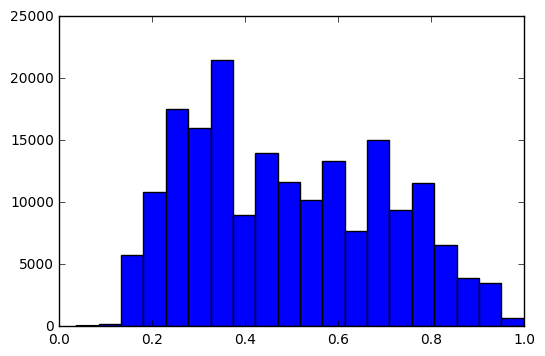


cont13
mean: 0.493137615836
standard deviation: 0.21277667738


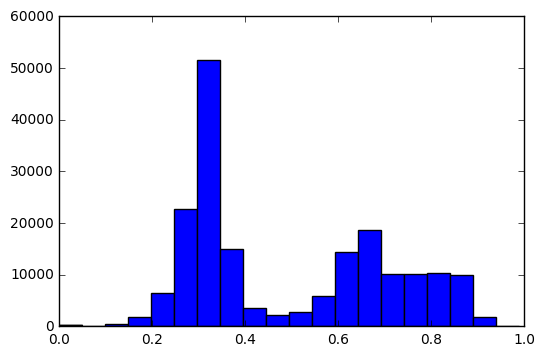


cont14
mean: 0.495717017975
standard deviation: 0.222486948835


In [ ]:
continuous = [ col for col in df_as.columns if col.startswith('cont') ]
for col in continuous:
    print(col)
    print('mean:', np.mean(df_as[col]))
    print('standard deviation:', np.std(df_as[col]))
    plt.hist(df_as[col], bins=20)
    plt.show()
    print()

In [15]:
import sklearn.linear_model

simple_features = binary + continuous

lm_log = sklearn.linear_model.LinearRegression()
lm_log.fit(train_df[simple_features], np.log(train_df['loss']))

lm_lin = sklearn.linear_model.LinearRegression()
lm_lin.fit(train_df[simple_features], train_df['loss'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
import collections
import pprint

lm = lm_log

plain_dict = { simple_features[ix]: lm.coef_[ix] for ix in range(len(simple_features)) }
sorted_dict = collections.OrderedDict(sorted(plain_dict.items(), key=lambda t: t[1]))
pprint.pprint(sorted_dict)

OrderedDict([('cat22', -0.71572718708933358),
             ('cat63', -0.44781578231649322),
             ('cont1', -0.40679159396962028),
             ('cat1', -0.25964821457577597),
             ('cont11', -0.24755399978632597),
             ('cat6', -0.23776145525272011),
             ('cat68', -0.2329508149512175),
             ('cat60', -0.20441537761509596),
             ('cat61', -0.17641734051924982),
             ('cat21', -0.15478318072119859),
             ('cont6', -0.1439366478426265),
             ('cont4', -0.10661478054126672),
             ('cat69', -0.10207093997395353),
             ('cat15', -0.10015565245034333),
             ('cat19', -0.097472012082754689),
             ('cat58', -0.081618981120853223),
             ('cont13', -0.081090152645790239),
             ('cat31', -0.077981849287646871),
             ('cat20', -0.071714197598638812),
             ('cat39', -0.061893582526246896),
             ('cat17', -0.059133067227314637),
             ('cat59', -0.040

The best candidates seem to be cat57, cont7, cat22, cat63, and cont1. There are some others worth considering too, but a first attempt might only need these.

In [25]:
small_lm = sklearn.linear_model.LinearRegression()
small_lm.fit(train_df[['cat57', 'cont7', 'cat22', 'cat63', 'cont1']], train_df['loss'])

pred_dev = small_lm.predict(devel_df[['cat57', 'cont7', 'cat22', 'cat63', 'cont1']])
true_dev = devel_df['loss']

In [36]:
from sklearn.metrics import median_absolute_error

print(median_absolute_error(pred_dev, true_dev))

1508.79866448


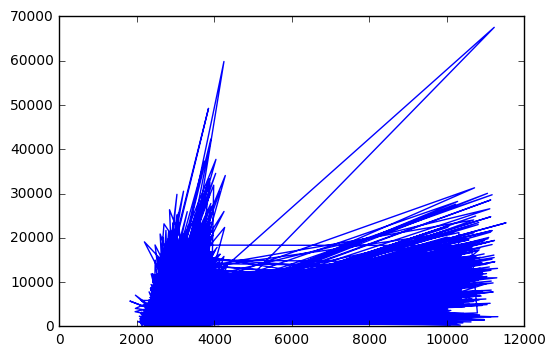

In [37]:
plt.plot(pred_dev, true_dev)
plt.show()